# Example 003: Spectrogram

References:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
- https://stackoverflow.com/questions/44787437/

Sound Resources:
- http://www.vita-chi.net/sozai1.htm
- https://soundeffect-lab.info/sound/anime/

In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
from scipy.io.wavfile import read

In [3]:
from audio_utils import *

In [4]:
FILE_NAME = "aaaa.wav"
FILE_NAME_MP3 = "アヒルが大笑い.mp3"

In [5]:
rng = np.random.default_rng()

In [6]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

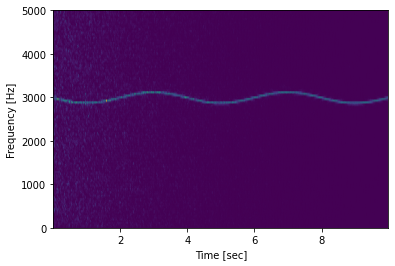

In [7]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

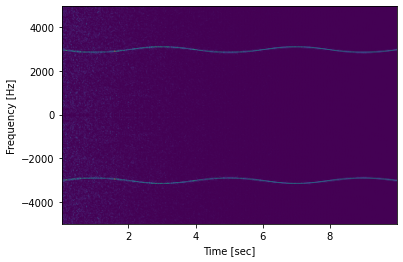

In [8]:
f, t, Sxx = signal.spectrogram(x, fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [9]:
sample_rate, samples = read(FILE_NAME)

In [10]:
length = samples.shape[0] / sample_rate

In [11]:
print(f"length = {length}s")

length = 3.4399773242630385s


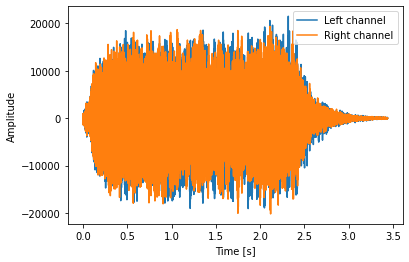

In [12]:
time = np.linspace(0., length, samples.shape[0])
plt.plot(time, samples[:, 0], label="Left channel")
plt.plot(time, samples[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

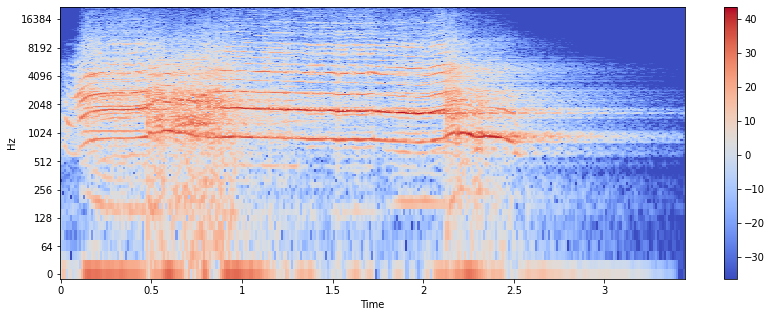

In [13]:
convert_audio_to_spectogram_log(FILE_NAME)

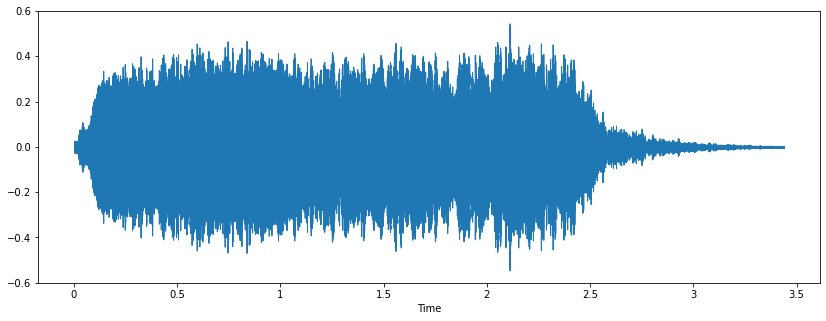

In [14]:
plot_mp3_matplot(FILE_NAME)